# Psych 45: N-back stats

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
sns.set(style='ticks', context='poster', font_scale=1.5)

/Users/zeynepenkavi/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Import data file

In [2]:
data = pd.read_csv('http://web.stanford.edu/class/psych45/demos/Psych45-nback_stats_2017.csv')

# filter RT column so just a number (ms and comma not included)
data.avg_rt = data.avg_rt.str.strip(' ms').str.replace(',', '').astype(float)

data.percent_correct = data.percent_correct.astype(float)
data.combined = data.combined.str.replace(',', '').astype(float)

# task_list = ['2-back', '3-back', '4-back', '5-back', '6-back', '7-back', '8-back']
task_list = ['2-back', '3-back', '4-back', '5-back']
task_list_subset = ['2-back', '3-back', '4-back']

In [3]:
data.head()

,task,percent_correct,avg_rt,combined,when,date_downloaded
0,2-back,73.33,651.12,887.88,14 hours ago,4/8/2017 9:52 AM
1,2-back,66.67,640.53,960.80,14 hours ago,4/8/2017 9:52 AM
2,2-back,40.00,787.44,1968.61,14 hours ago,4/8/2017 9:52 AM
3,2-back,80.00,848.13,1060.16,17 hours ago,4/8/2017 9:52 AM
4,2-back,86.67,809.40,933.92,17 hours ago,4/8/2017 9:52 AM


## Analyses

#### Number of data points:

In [4]:
data.groupby(['task']).count().when

task
2-back    151
3-back    103
4-back     27
5-back      7
Name: when, dtype: int64

#### Mean accuracy and response time:

In [5]:
data.groupby(['task']).mean().reset_index()

,task,percent_correct,avg_rt,combined
0,2-back,71.627815,895.365232,1497.726291
1,3-back,52.760388,987.278350,2094.078932
2,4-back,45.577778,1002.651481,2472.497778
3,5-back,52.875714,1113.028571,2194.667143


### How does task affect percent of trials correct?

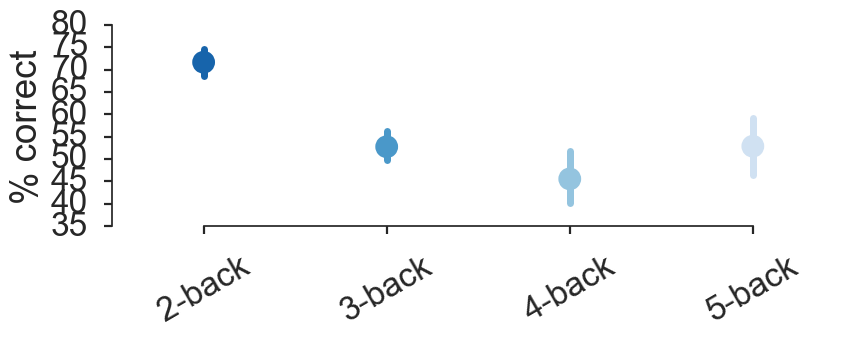

In [6]:
g = sns.factorplot(x='task', y='percent_correct', 
                   order=task_list,
                   data=data, 
                   ci=95, 
                   aspect=2.3,
                   palette=sns.color_palette("Blues_r", 
                                             n_colors=len(task_list)))
g.set_xlabels('')
g.set_ylabels('% correct')
g.set_xticklabels(rotation=30)
sns.despine(trim=True)

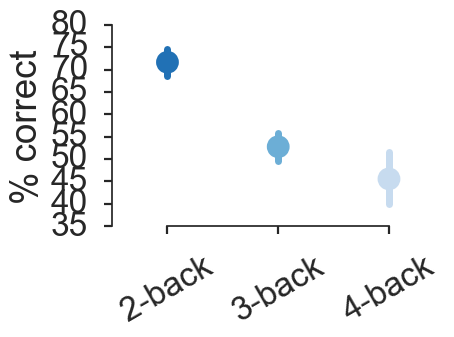

In [7]:
g = sns.factorplot(x='task', y='percent_correct', 
                   order=task_list_subset,
                   data=data, 
                   palette=sns.color_palette("Blues_r", 
                                             n_colors=len(task_list_subset)), 
                   ci=95, 
                   aspect=1.3)
g.set_ylabels('% correct')
g.set_xlabels('')
g.set_xticklabels(rotation=30)
sns.despine(trim=True)

### How does task affect average response time on correct trials?

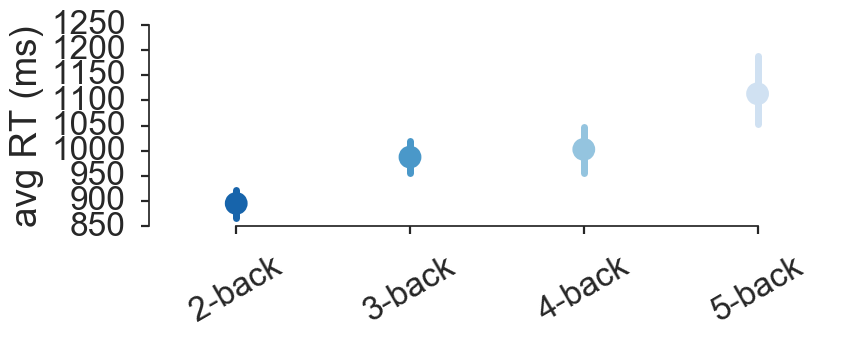

In [8]:
g = sns.factorplot(x='task', y='avg_rt', 
                   order=task_list,
                   data=data, 
                   palette=sns.color_palette("Blues_r", 
                                             n_colors=len(task_list)), 
                   ci=95, 
                   aspect=2.3)
g.set_ylabels('avg RT (ms)')
g.set_xlabels('')
g.set_xticklabels(rotation=30)
sns.despine(trim=True)

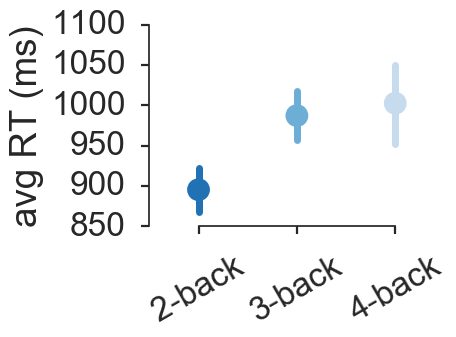

In [9]:
g = sns.factorplot(x='task', y='avg_rt', 
                   order=task_list_subset,
                   data=data, 
                   palette=sns.color_palette("Blues_r", 
                                             n_colors=len(task_list_subset)), 
                   ci=95, 
                   aspect=1.3)
g.set_ylabels('avg RT (ms)')
g.set_xlabels('')
g.set_xticklabels(rotation=30)
sns.despine(trim=True)

### What about combined (correct and incorrect trials) RT?

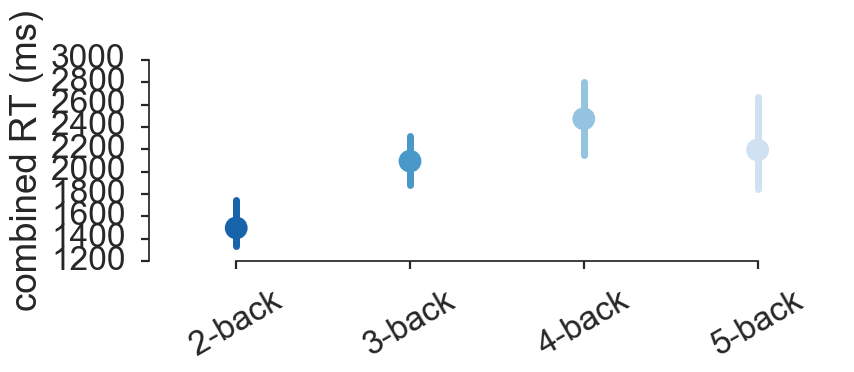

In [10]:
g = sns.factorplot(x='task', y='combined', 
                   order=task_list,
                   data=data, 
                   palette=sns.color_palette("Blues_r", 
                                             n_colors=len(task_list)), 
                   ci=95, 
                   aspect=2.3)
g.set_ylabels('combined RT (ms)')
g.set_xlabels('')
g.set_xticklabels(rotation=30)
sns.despine(trim=True)